# SMS класифікація спаму

In [109]:
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [74]:
import warnings as wr
import pandas as pd
wr.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

sms=pd.read_csv("./spam.csv", encoding='latin-1')
print("Shape: ", sms.shape)
sms.head()

Shape:  (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<Axes: >

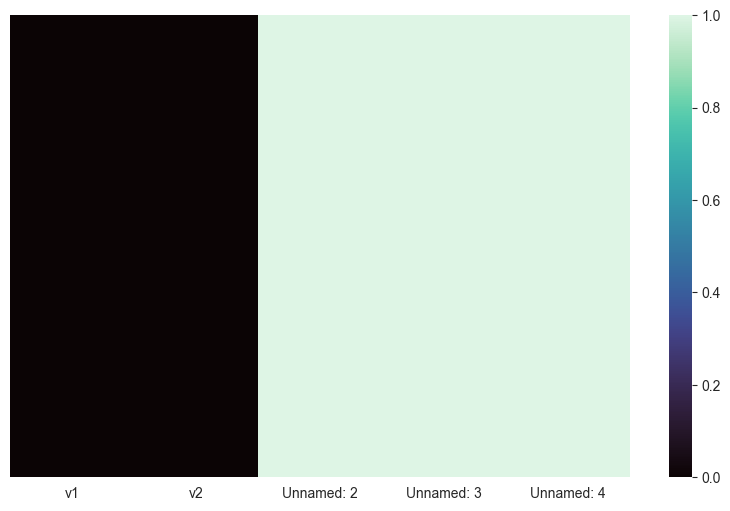

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(sms.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [76]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Колонки Unnamed 2-4 можна видалити, оскільки вони в більшості пусті

In [77]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


v1
ham     4825
spam     747
Name: count, dtype: int64


<Axes: xlabel='v1', ylabel='count'>

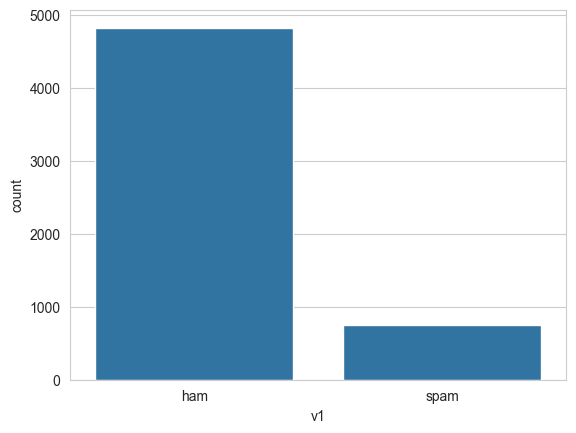

In [78]:
print(sms.v1.value_counts())
sns.countplot(x="v1", data = sms)

In [79]:
# ham -> 0
# spam -> 1
sms['v1'] = sms.v1.map({'ham':0, 'spam':1})
sms.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
ham=sms[sms["v1"]==0]
spam=sms[sms["v1"]==1]

In [81]:
ham.shape,spam.shape

((4825, 2), (747, 2))

In [82]:
data = pd.concat([ham, spam], ignore_index=True)
print("Shape :", data.shape)
data.head()

Shape : (5572, 2)


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,0,Even my brother is not like to speak with me. ...


In [83]:
X = data.v2
y = data.v1

In [84]:
# ділимо датасет на навчальний та тестувальний
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [86]:
# створюємо словник, будуємо DTM
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7395 sparse matrix of type '<class 'numpy.int64'>'
	with 55109 stored elements in Compressed Sparse Row format>

In [87]:
# будуємо DTM на тестових даних
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7395 sparse matrix of type '<class 'numpy.int64'>'
	with 17413 stored elements in Compressed Sparse Row format>

In [88]:
# кількість колонок не змінюється, оскільки для тестових даних використовується той самий словник, що і для навчальних 

# MultinomialNB

In [89]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [90]:
y_pred_class = nb.predict(X_test_dtm)

In [91]:
# точність
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9827709978463748

<Axes: >

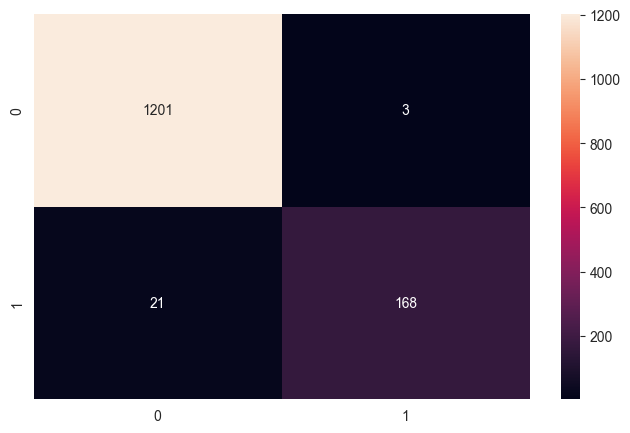

In [92]:
# матриця невідповідностей
import matplotlib.pyplot as plt
cf_matrix=metrics.confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True, fmt='d')

In [93]:
# false positives
X_test[(y_pred_class==1) & (y_test==0)]

4208                    Nokia phone is lovly..
3784    Mathews or tait or edwards or anderson
4066                    I liked the new mobile
Name: v2, dtype: object

In [94]:
# false negatives
X_test[(y_pred_class==0) & (y_test==1)]

5204    How come it takes so little time for a child w...
5495    You can donate å£2.50 to UNICEF's Asian Tsunam...
5176    Your next amazing xxx PICSFREE1 video will be ...
5284    Am new 2 club & dont fink we met yet Will B gr...
5057    0A$NETWORKS allow companies to bill for SMS, s...
5472    Check Out Choose Your Babe Videos @ sms.shsex....
5160    Babe: U want me dont u baby! Im nasty and have...
5135    Back 2 work 2morro half term over! Can U C me ...
5547    dating:i have had two of these. Only started a...
4939    Ever thought about living a good life with a p...
5371    TBS/PERSOLVO. been chasing us since Sept forå£...
5456    Hi babe its Chloe, how r u? I was smashed on s...
5433    Money i have won wining number 946 wot do i do...
4956    Talk sexy!! Make new friends or fall in love i...
5091    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4972    How about getting in touch with folks waiting ...
4839    Did you hear about the new \Divorce Barbie\"? ...
5553    Latest

In [95]:
# площа під кривою
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.977807660531913

# LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)

LogisticRegression()

In [97]:
y_pred_class = logreg.predict(X_test_dtm)

In [98]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9763101220387652

In [99]:
# площа під кривою
metrics.roc_auc_score(y_test, y_pred_prob)

0.977807660531913

In [100]:
# remove English stop words
vect1 = CountVectorizer(stop_words='english')
X_train_1 = vect1.fit_transform(X_train)
X_train_1

<4179x7136 sparse matrix of type '<class 'numpy.int64'>'
	with 32373 stored elements in Compressed Sparse Row format>

In [101]:
# включає 1-грами and 2-грами
# "Happy", "Not Happy", "Very Happy"
vect2 = CountVectorizer(ngram_range=(1, 2))

X_train_2 = vect2.fit_transform(X_train)

X_train_2

<4179x40734 sparse matrix of type '<class 'numpy.int64'>'
	with 110149 stored elements in Compressed Sparse Row format>

In [102]:
# ігнорувати терміни, які зустрічаються в більш ніж 50% документів
vect3 = CountVectorizer(max_df=0.5)

X_train_3 = vect3.fit_transform(X_train)

X_train_3

<4179x7395 sparse matrix of type '<class 'numpy.int64'>'
	with 55109 stored elements in Compressed Sparse Row format>

In [103]:
# зберігати лише ті терміни, які є принаймні у 2 документах
vect4 = CountVectorizer(min_df=2)

X_train_4 = vect4.fit_transform(X_train)

X_train_4

<4179x3451 sparse matrix of type '<class 'numpy.int64'>'
	with 51165 stored elements in Compressed Sparse Row format>

In [104]:
vect_fine_tuned= CountVectorizer(stop_words='english',ngram_range=(1, 2))

In [105]:
X_train_c = vect_fine_tuned.fit_transform(X_train)
X_test_c = vect_fine_tuned.transform(X_test)

X_train_c

<4179x29761 sparse matrix of type '<class 'numpy.int64'>'
	with 61972 stored elements in Compressed Sparse Row format>

In [106]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_c, y_train)
y_pred_class = nb.predict(X_test_c)

<Axes: >

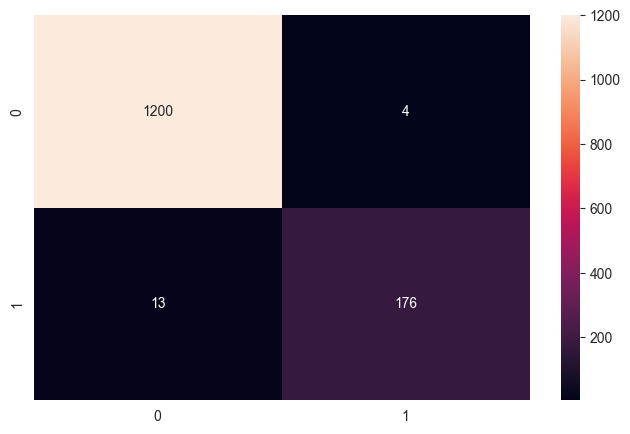

In [107]:
nb_cf_matrix=metrics.confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,5))
sns.heatmap(nb_cf_matrix, annot=True, fmt='d')

In [108]:
!pip install gradio
import gradio as gr


def classify_message(message):
    user_input_dtm = vect_fine_tuned.transform([message])
    proba = nb.predict_proba(user_input_dtm)
    return {'Ham': proba[0][0],
            'Spam': proba[0][1]}

interface = gr.Interface(
    fn=classify_message,
    inputs=gr.Textbox(lines=2, placeholder="Enter SMS message..."),
    outputs=gr.Textbox(),
    title="SMS Ham/Spam Classifier",
    description="Enter an SMS message to classify it as Ham or Spam."
)

interface.launch(debug=True, inbrowser=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
